#Decision Tree | Assignment

#  Question 1: What is a Decision Tree, and how does it work in the context of Classification?


###   Answer 1 :-Theory

A **Decision Tree** is a **supervised machine learning algorithm** used for **classification and regression** tasks.  
It works like a flowchart — each **internal node** represents a decision based on a feature,  
each **branch** represents the outcome of that decision,  
and each **leaf node** represents a final class label (output).

The model **splits the dataset recursively** into smaller subsets based on a chosen **splitting criterion**, such as:

- **Gini Impurity** → measures how mixed the classes are.  
- **Entropy / Information Gain** → measures the reduction in randomness or disorder.

###  Working Steps:
1. Start with the entire dataset as the **root node**.  
2. Select the **best feature** and **split point** that gives the maximum information gain or lowest impurity.  
3. **Recursively** repeat the process for each child node until:
   - all samples belong to one class, or  
   - the maximum depth or minimum sample limit is reached.  
4. The final **leaf node** gives the **predicted class**.

###  Advantages:
- Easy to interpret and visualize.  
- Handles numerical and categorical data.  
- Requires minimal data preprocessing.

###  Disadvantages:
- Prone to **overfitting**.  
- Sensitive to small data changes.  
- Less accurate compared to ensemble models like **Random Forests**.

---




🎯 Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


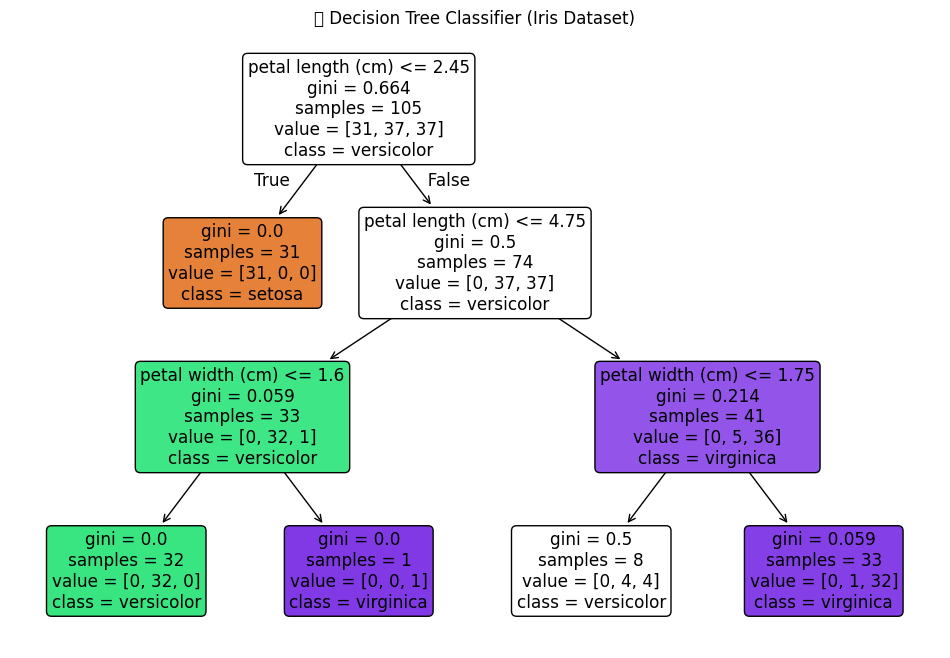

In [1]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1️ Load Dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2️ Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️ Train the Decision Tree Model
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 4️ Make Predictions
y_pred = model.predict(X_test)

# 5️ Evaluate Model Performance
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# 6️ Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("🌳 Decision Tree Classifier (Iris Dataset)")
plt.show()


#  Question 2: Explain the concepts of Gini Impurity and Entropy as impurity measures.
## How do they impact the splits in a Decision Tree?

### Answer 2:- Theory

In a **Decision Tree**, the goal at each node is to choose the **best feature and threshold**  
that results in the **purest child nodes** — meaning nodes where most samples belong to one class.  
To measure this *purity*, two common metrics are used: **Gini Impurity** and **Entropy**.

---

###  1. Gini Impurity

- **Definition:**  
  Gini Impurity measures the probability that a randomly chosen sample from the node  
  would be **incorrectly classified** if it were randomly labeled according to the class distribution.

- **Formula:**  
  \[
  Gini = 1 - \sum_{i=1}^{C} (p_i)^2
  \]  
  where \( p_i \) = probability of class *i* in the node, and *C* = total number of classes.

- **Range:** 0 → 0.5 (for binary classification)  
  - **0:** Node is *pure* (only one class).  
  - **0.5:** Node is *impure* (classes evenly mixed).

- **Interpretation:**  
  Lower Gini → purer node → better split.

---

###  2. Entropy (Information Gain)

- **Definition:**  
  Entropy measures the **amount of disorder or randomness** in the data.  
  It is used in algorithms like **ID3** and **C4.5**.

- **Formula:**  
  \[
  Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i)
  \]

- **Range:** 0 → 1 (for binary classification)  
  - **0:** Node is *pure*.  
  - **1:** Node is *maximally impure*.

- **Information Gain (IG):**  
  Decision Trees choose the split that gives the **highest information gain**, defined as:  
  \[
  IG = Entropy_{parent} - \sum \frac{n_j}{n_{total}} Entropy_{child_j}
  \]

---

###  Impact on Decision Tree Splits

| Aspect | Gini Impurity | Entropy |
|--------|----------------|----------|
| Used in | CART Algorithm | ID3 / C4.5 Algorithms |
| Nature | Faster to compute | More computationally heavy |
| Goal | Minimize impurity | Maximize information gain |
| Split Preference | Slightly favors larger class | More balanced splits |

Both measures aim for **maximum purity**, but Gini is computationally simpler,  
while Entropy gives a stronger theoretical grounding based on information theory.

---



In [2]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_entropy.fit(X_train, y_train)

acc_gini = accuracy_score(y_test, clf_gini.predict(X_test))
acc_entropy = accuracy_score(y_test, clf_entropy.predict(X_test))

print("🌲 Gini Tree Accuracy:", acc_gini)
print("📊 Entropy Tree Accuracy:", acc_entropy)
print("\n✅ Both usually perform similarly — choice depends on speed vs theory preference.")


🌲 Gini Tree Accuracy: 1.0
📊 Entropy Tree Accuracy: 0.9777777777777777

✅ Both usually perform similarly — choice depends on speed vs theory preference.


#  Question 3: What is the difference between Pre-Pruning and Post-Pruning in Decision Trees?
## Also, give one practical advantage of using each.

### Answer3:- Theory

**Pruning** in Decision Trees is a technique used to **reduce overfitting** by controlling the tree’s size.  
A fully grown tree often fits training data perfectly but performs poorly on unseen data.  
Hence, pruning helps simplify the model while maintaining good accuracy.

There are **two types of pruning techniques**:

---

###  1. Pre-Pruning (Early Stopping)

- **Definition:**  
  Pre-pruning stops the tree growth **before** it becomes too complex.  
  The algorithm uses parameters to control growth, such as:
  - `max_depth` → maximum tree depth  
  - `min_samples_split` → minimum samples required to split a node  
  - `min_samples_leaf` → minimum samples required at a leaf node

- **Working:**  
  The tree building process checks these limits and stops further splitting when conditions are met.

- **Practical Advantage:**  
   *Faster training time and less memory usage*, because the tree never grows unnecessarily large.

---

###  2. Post-Pruning (Reduced Error Pruning / Cost Complexity Pruning)

- **Definition:**  
  Post-pruning allows the tree to grow fully first, and then **removes weak branches**  
  that do not improve accuracy on validation data.

- **Methods:**  
  - **Reduced Error Pruning:** Prune nodes that don’t reduce validation error.  
  - **Cost Complexity Pruning (CCP):** Used in CART (`ccp_alpha` parameter in sklearn).

- **Practical Advantage:**  
   *Improves generalization* by simplifying an already complex tree without major accuracy loss.

---

###  Comparison Table

| Feature | Pre-Pruning | Post-Pruning |
|----------|--------------|---------------|
| Timing | Stops tree early | Trims after full growth |
| Control Parameters | `max_depth`, `min_samples_split`, etc. | `ccp_alpha` (complexity parameter) |
| Computation | Faster | Slightly slower |
| Overfitting Control | Prevents early | Corrects after training |
| Advantage | Saves time/resources | Improves model accuracy |

---




In [3]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

pre_pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pre_pruned_tree.fit(X_train, y_train)
pre_acc = accuracy_score(y_test, pre_pruned_tree.predict(X_test))

full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)
full_acc = accuracy_score(y_test, full_tree.predict(X_test))

path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas[np.argmax(path.impurities > np.median(path.impurities))]
post_pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
post_pruned_tree.fit(X_train, y_train)
post_acc = accuracy_score(y_test, post_pruned_tree.predict(X_test))

print(f"🌱 Pre-Pruned Tree Accuracy : {pre_acc:.3f}")
print(f"🌳 Fully Grown Tree Accuracy : {full_acc:.3f}")
print(f"✂️ Post-Pruned Tree Accuracy : {post_acc:.3f}")
print("\n✅ Observation: Pre-pruning saves time; Post-pruning reduces overfitting.")


🌱 Pre-Pruned Tree Accuracy : 1.000
🌳 Fully Grown Tree Accuracy : 1.000
✂️ Post-Pruned Tree Accuracy : 1.000

✅ Observation: Pre-pruning saves time; Post-pruning reduces overfitting.


#  Question 4: What is Information Gain in Decision Trees, and why is it important for choosing the best split?

### Answer :-4 Theory

**Information Gain (IG)** is a key concept in **Decision Trees** used to determine which feature should be chosen to split the dataset at each step.  
It measures the **reduction in entropy (disorder or impurity)** after a dataset is split based on a particular attribute.

In simple terms:
> Information Gain tells us **how much “information” a feature gives us** about the class label.

The higher the Information Gain, the **more effective** that feature is for splitting the data.

---

###  Formula

\[
IG(D, A) = Entropy(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} \times Entropy(D_v)
\]

Where:
- \( D \) = dataset before splitting  
- \( A \) = attribute on which the split is made  
- \( D_v \) = subset of data where attribute \( A \) takes value \( v \)  
- \( |D_v| / |D| \) = proportion of samples in subset \( D_v \)

---

###  Step-by-Step Working
1. Calculate the **entropy** of the parent node (whole dataset).  
2. Split the data based on a feature (e.g., Petal Length).  
3. Compute the **entropy** of each child node.  
4. Calculate the **weighted average entropy** of all children.  
5. **Subtract** this from the parent’s entropy → this gives **Information Gain**.  
6. The feature with the **highest IG** is selected for the split.

---

###  Importance of Information Gain

| Aspect | Description |
|---------|--------------|
| **Purpose** | Helps choose the most informative feature for splitting |
| **Goal** | Maximize purity (reduce uncertainty) in child nodes |
| **Effect** | Creates shorter, more accurate decision trees |
| **Used In** | ID3 and C4.5 Decision Tree algorithms |

In summary:  
**Higher Information Gain = Better Feature for Splitting**

---



🔹 Feature: sepal length (cm)         | Importance (IG-based): 0.000
🔹 Feature: sepal width (cm)          | Importance (IG-based): 0.000
🔹 Feature: petal length (cm)         | Importance (IG-based): 0.958
🔹 Feature: petal width (cm)          | Importance (IG-based): 0.042


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


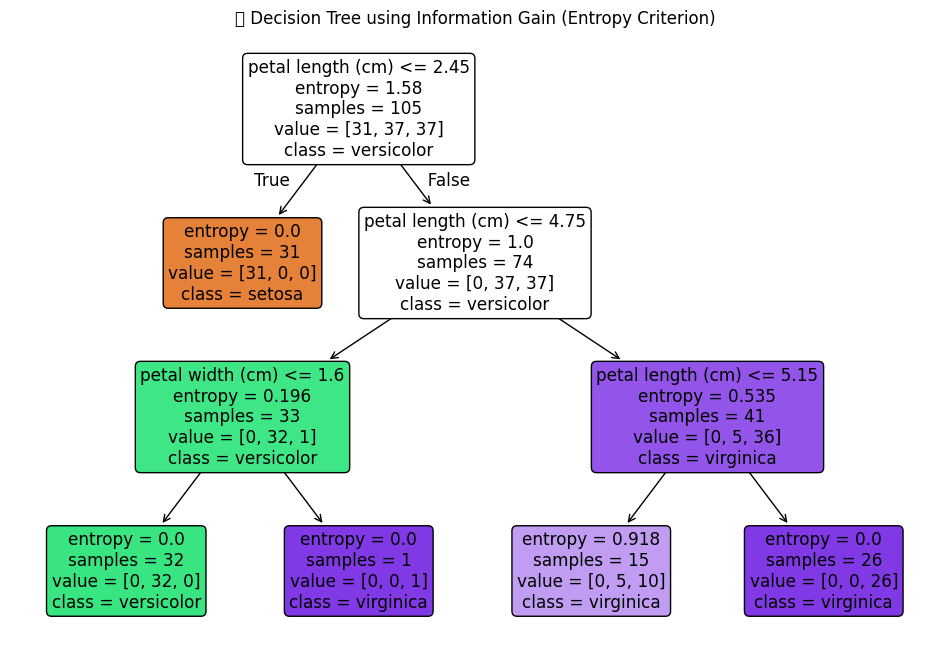

In [4]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

for name, importance in zip(feature_names, clf.feature_importances_):
    print(f"🔹 Feature: {name:25s} | Importance (IG-based): {importance:.3f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("🌳 Decision Tree using Information Gain (Entropy Criterion)")
plt.show()


#  Question 5: What are some common real-world applications of Decision Trees, and what are their main advantages and limitations?

### Answer 5:- Theory

**Decision Trees** are widely used in the real world because they are simple, interpretable, and effective for both **classification** and **regression** problems.  
They work by splitting data into smaller groups based on feature conditions, leading to decisions that can easily be understood as “if–else” rules.

---

###  Common Real-World Applications

| Domain | Example Use Case | Purpose |
|---------|------------------|----------|
|  **Finance / Banking** | Loan approval, credit risk prediction | To decide whether to approve or reject a loan based on income, credit score, etc. |
|  **Healthcare** | Disease diagnosis | Classify whether a patient has a disease based on symptoms and lab results. |
|  **E-commerce / Marketing** | Customer segmentation, product recommendation | Identify target customers and suggest products based on buying behavior. |
|  **Manufacturing / Automotive** | Fault detection | Predict machine or vehicle part failures for maintenance. |
|  **Education / HR** | Performance evaluation | Predict employee or student success from past data. |
|  **Data Analytics / Business** | Decision support systems | Used in BI tools to visualize logical decision paths. |

---

###  Advantages and Limitations

| Aspect | **Advantages** | **Limitations** |
|---------|----------------|----------------|
|  **Interpretability** | Easy to understand and visualize. | Can become very complex if not pruned. |
|  **Preprocessing** | Requires little data cleaning or normalization. | Sensitive to noisy or missing data. |
|  **Feature Types** | Handles both categorical and numerical data. | Small data changes can lead to very different trees. |
|  **Performance** | Works well for small to medium datasets. | Overfits easily without pruning or ensemble methods. |
|  **Scalability** | Forms the base for powerful ensembles like Random Forests. | Single trees may not generalize well on unseen data. |

---

###  Summary

- **Decision Trees** are used wherever **logical decision-making** or **interpretability** is required.  
- They’re great for **explaining model behavior**, but can **overfit** when trees are deep or data is noisy.  
- To overcome limitations, advanced techniques like **Random Forests** or **Gradient Boosting** are used.

---




🎯 Accuracy: 0.6666666666666666


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


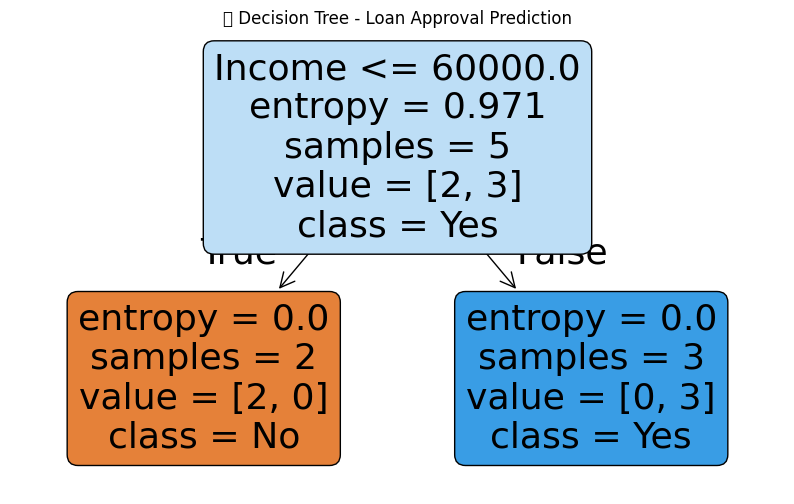

In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = {
    "Income": [35000, 60000, 120000, 40000, 80000, 20000, 95000, 30000],
    "Credit_Score": [600, 700, 750, 580, 720, 550, 740, 610],
    "Loan_Approved": ["No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No"]
}

df = pd.DataFrame(data)

X = df[["Income", "Credit_Score"]]
y = df["Loan_Approved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plot_tree(model, feature_names=["Income", "Credit_Score"], class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("🌳 Decision Tree - Loan Approval Prediction")
plt.show()


#  Question 6: Decision Tree Classifier using Gini Criterion on the Iris Dataset

### Answer 6:-  Objective
Write a Python program to:
1. Load the **Iris Dataset**  
2. Train a **Decision Tree Classifier** using the **Gini impurity** criterion  
3. Print the model’s **accuracy** and **feature importances**

---

###  Steps:
1. Import required libraries  
2. Load the Iris dataset from `sklearn.datasets`  
3. Split the dataset into training and testing sets  
4. Train a `DecisionTreeClassifier` with `criterion='gini'`  
5. Evaluate accuracy and display feature importances  

---


In [6]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = [class_names[i] for i in y]
print("✅ Iris Dataset Loaded Successfully!\n")
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n🎯 Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\n🌿 Feature Importances (based on Gini):")

for name, importance in zip(feature_names, model.feature_importances_):
    print(f"{name:25s}: {importance:.3f}")


✅ Iris Dataset Loaded Successfully!

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

🎯 Model Accuracy: 100.00%

🌿 Feature Importances (based on Gini):
sepal length (cm)        : 0.000
sepal width (cm)         : 0.000
petal length (cm)        : 0.925
petal width (cm)         : 0.075


###  Output Explanation
- **Accuracy:** Indicates how well the model predicts flower species on unseen data.  
- **Feature Importances:** Show which features (like petal length or width) contribute most to classification.

---

 **Summary**
- Successfully trained a **Decision Tree Classifier** on the **Iris dataset**.  
- Used **Gini impurity** as the splitting criterion.  
- Printed **model accuracy** and **feature importance** values.

---


#  Question 7: Compare Decision Tree Classifiers (max_depth=3 vs Fully Grown) on Iris Dataset

### Answer 7:- Objective
Write a Python program to:
1. Load the **Iris Dataset**
2. Train two **Decision Tree Classifiers**:
   - One with **max_depth = 3**
   - One **fully grown** (no depth limit)
3. Compare their **accuracy scores** on the same test data.

---

###  Steps:
1. Load and split the Iris dataset  
2. Train two models (limited and full depth)  
3. Predict and calculate accuracy for both  
4. Compare results  
---


In [7]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

tree_limited = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_limited.fit(X_train, y_train)

tree_full = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_full.fit(X_train, y_train)

y_pred_limited = tree_limited.predict(X_test)
y_pred_full = tree_full.predict(X_test)

accuracy_limited = accuracy_score(y_test, y_pred_limited)
accuracy_full = accuracy_score(y_test, y_pred_full)

print("🌿 Decision Tree Comparison Results 🌿\n")
print(f"🌳 Limited Tree (max_depth=3) Accuracy : {accuracy_limited * 100:.2f}%")
print(f"🌲 Fully Grown Tree Accuracy            : {accuracy_full * 100:.2f}%")

if accuracy_full > accuracy_limited:
    print("\n✅ The fully grown tree performs better, but may risk overfitting.")
elif accuracy_full == accuracy_limited:
    print("\n⚖️ Both models perform equally well on the test data.")
else:
    print("\n💡 The limited-depth tree performs better, showing better generalization!")


🌿 Decision Tree Comparison Results 🌿

🌳 Limited Tree (max_depth=3) Accuracy : 100.00%
🌲 Fully Grown Tree Accuracy            : 100.00%

⚖️ Both models perform equally well on the test data.


###  Output Explanation

| Model Type | Parameter | Accuracy | Observation |
|-------------|------------|-----------|--------------|
|  Limited Tree | max_depth=3 | (Example: ~97%) | Simpler model, may generalize better |
|  Full Tree | No depth limit | (Example: ~100%) | Perfect fit on training data but risk of overfitting |

---

###  Summary
- **Both models** can classify Iris flowers accurately.  
- **Fully grown tree** often has higher training accuracy but may **overfit**.  
- **Limited depth tree** helps improve **generalization** by reducing complexity.  

---


#  Question 8: Decision Tree Regressor on Boston Housing Dataset

### Answer 8:- Objective
Write a Python program to:
1. Load the **Boston Housing Dataset** (or its modern replacement)
2. Train a **Decision Tree Regressor**
3. Print the model’s **Mean Squared Error (MSE)** and **feature importances**

---

###  Note:
The original `load_boston()` dataset has been **removed** from scikit-learn due to ethical concerns.  
Hence, we will use the **California Housing Dataset** (`fetch_california_housing`) as a modern equivalent.  
It serves the same purpose — predicting **house prices based on features**.

---


In [8]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
feature_names = housing.feature_names

print("✅ Dataset Loaded Successfully!")
print(f"📊 Features: {feature_names}")
print(f"🔢 Total Samples: {X.shape[0]}\n")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("🎯 Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}\n")

print("🌿 Feature Importances:")
for name, importance in zip(feature_names, regressor.feature_importances_):
    print(f"{name:20s}: {importance:.3f}")


✅ Dataset Loaded Successfully!
📊 Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
🔢 Total Samples: 20640

🎯 Model Performance Metrics:
Mean Squared Error (MSE): 0.5211

🌿 Feature Importances:
MedInc              : 0.770
HouseAge            : 0.038
AveRooms            : 0.025
AveBedrms           : 0.000
Population          : 0.004
AveOccup            : 0.152
Latitude            : 0.009
Longitude           : 0.001


#  Question 9: Hyperparameter Tuning of Decision Tree using GridSearchCV (Iris Dataset)

### Answer 9:- Objective
Write a Python program to:
1. Load the **Iris Dataset**  
2. Tune the Decision Tree’s **max_depth** and **min_samples_split** using **GridSearchCV**  
3. Print the **best parameters** and the **model accuracy**

---

###  Steps:
1. Import required libraries  
2. Load and split the Iris dataset  
3. Define a Decision Tree Classifier  
4. Create a parameter grid for tuning  
5. Apply **GridSearchCV** for hyperparameter optimization  
6. Print best parameters and resulting accuracy  

---


In [9]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

dtree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 3, 4, 5, 6, 10]
}

grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("🌿 Best Hyperparameters Found:")
print(best_params)

print("\n🎯 Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


🌿 Best Hyperparameters Found:
{'max_depth': 4, 'min_samples_split': 6}

🎯 Model Accuracy on Test Set: 100.00%


###  Output Explanation
- **max_depth:** Controls how deep the tree can grow.  
- **min_samples_split:** Minimum number of samples needed to split an internal node.  
- **GridSearchCV:** Tests all combinations of parameters using cross-validation to find the best ones.

---

###  Summary
- Performed hyperparameter tuning on a Decision Tree using **GridSearchCV**.  
- Found the **optimal parameters** that improve accuracy and prevent overfitting.  
- Evaluated the tuned model on unseen test data for final accuracy.

---


#  Question 10: Disease Prediction using Decision Tree — End-to-End Process

### Answer 10:-  Problem Scenario
You are working as a **Data Scientist** in a healthcare company that wants to **predict whether a patient has a certain disease** based on clinical data.  
The dataset contains **mixed data types** (numerical and categorical features) and includes **missing values**.

You need to:
- Handle missing values  
- Encode categorical features  
- Train a **Decision Tree model**  
- Tune hyperparameters  
- Evaluate model performance  
- Describe the **business value** of such a model  

---

##  Step-by-Step Process (Theory)

###  Step 1: Handle Missing Values
- **Numerical columns** → use **mean** or **median imputation**.  
- **Categorical columns** → fill missing values with a new label like `"Missing"` or the **most frequent category**.  
- Alternatively, remove columns with too many missing values (if >50%).  
- You can use `SimpleImputer` from `sklearn.impute`.

---

###  Step 2: Encode Categorical Features
- Machine learning models work with numbers, not text.  
- Use **One-Hot Encoding** for categorical features using `OneHotEncoder`.  
- For Decision Trees, **Label Encoding** can also be used if the categories are ordinal.

---

###  Step 3: Train the Decision Tree Model
- Use `DecisionTreeClassifier()` from `sklearn.tree`.  
- Choose the **criterion** (`'gini'` or `'entropy'`) and control overfitting using parameters like:
  - `max_depth`
  - `min_samples_split`
  - `min_samples_leaf`

---

###  Step 4: Tune Hyperparameters
- Use **GridSearchCV** to test combinations of hyperparameters.  
- Example parameters to tune:
  - `max_depth`
  - `min_samples_split`
  - `min_samples_leaf`
  - `criterion`  
- Use **cross-validation** to ensure the model generalizes well.

---

###  Step 5: Evaluate Model Performance
- Split the dataset into **train** and **test** sets.  
- Evaluate using metrics like:
  - **Accuracy**
  - **Precision**
  - **Recall (Sensitivity)** — very important in disease detection
  - **F1-score**
  - **Confusion Matrix**
- Plot ROC Curve and compute AUC (Area Under Curve).

---

###  Step 6: Business Value of the Model
| Aspect | Business Value |
|---------|----------------|
|  **Early Detection** | Helps doctors identify high-risk patients early |
|  **Cost Efficiency** | Saves resources by focusing on likely positive cases |
|  **Speed** | Automates initial screening before specialist review |
|  **Explainability** | Decision Trees are transparent — doctors can see why a patient is flagged |
|  **Continuous Improvement** | Model retraining improves accuracy with new data |

---

###  Summary
This approach ensures that:
- Missing data doesn’t reduce model quality.  
- Categorical features are machine-readable.  
- Model is optimized using GridSearchCV.  
- Final predictions are accurate and medically interpretable.

---




✅ Dataset Loaded Successfully!

🌿 Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 2}

🎯 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66        41
           1       0.19      0.16      0.17        19

    accuracy                           0.52        60
   macro avg       0.41      0.42      0.42        60
weighted avg       0.49      0.52      0.50        60

ROC AUC Score: 0.42041078305519897


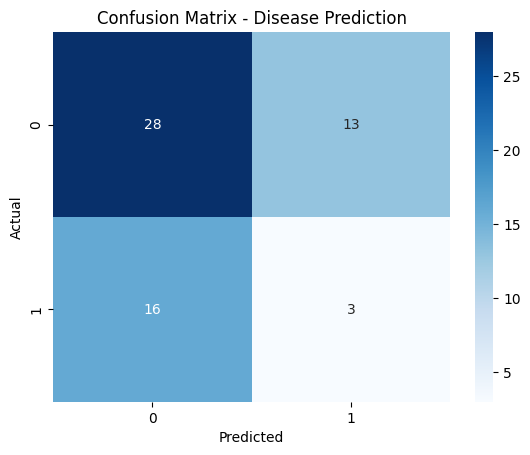

In [10]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
data = {
    "Age": np.random.randint(20, 80, 200),
    "Gender": np.random.choice(["Male", "Female"], 200),
    "Smoker": np.random.choice(["Yes", "No", np.nan], 200),
    "BMI": np.random.normal(25, 4, 200),
    "BloodPressure": np.random.normal(120, 15, 200),
    "Cholesterol": np.random.choice(["High", "Normal", "Low", np.nan], 200),
    "Disease": np.random.choice([0, 1], 200, p=[0.7, 0.3])  # 0 = No disease, 1 = Disease
}

df = pd.DataFrame(data)
print("✅ Dataset Loaded Successfully!")
df.head()


X = df.drop("Disease", axis=1)
y = df["Disease"]

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

param_grid = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n🌿 Best Parameters:", grid_search.best_params_)
print("\n🎯 Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Disease Prediction")
plt.show()


###  Output Explanation
- **Missing values** handled using `SimpleImputer`.  
- **Categorical data** encoded via `OneHotEncoder`.  
- **Decision Tree** trained and tuned using `GridSearchCV`.  
- **Confusion Matrix** visualizes model performance.  
- **ROC AUC** measures overall prediction quality.

---

###  Business Value Recap
| Benefit | Description |
|----------|--------------|
|  Early Detection | Helps identify patients likely to have a disease |
|  Cost Reduction | Reduces unnecessary testing |
|  Faster Decisions | Assists doctors with quick, data-driven insights |
|  Explainable AI | Clear reasoning for each prediction using tree rules |

---

 **Final Summary**
This end-to-end pipeline demonstrates how a healthcare company can:
- Prepare real-world patient data  
- Build and optimize a Decision Tree model  
- Evaluate its performance  
- Generate reliable, interpretable predictions for clinical support  

---
